mercury.App

**Python の天文計算ライブラリ PyEphem を使用して日の出／入を計算します**

参考：[天文計算ライブラリ => PyEphem](https://rhodesmill.org/pyephem/)

参考：[国立天文台 => 横浜（神奈川）](https://eco.mtk.nao.ac.jp/koyomi/dni/2024/dni15.html)

mercury.Checkbox

Checkbox is OFF


# 計算結果

**以下のとおり計算しました。**

## 入力情報

位置情報： (緯度, 経度) = (35.4500, 139.6500)

🌎[地図で位置を確認する](https://www.google.com/maps?q=35.4500,139.6500)

## 概要情報

本日の情報： (日付, 日の出, 日の入, 日中長[時間]) = (2024-05-06, 04:44:29, 18:32:02, 13.79)

### 日の出🌅

【最早】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-13, 04.42, 18.96, 14.54)

【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-01-08, 06.85, 16.75, 09.90)

### 日の入🌇

【最早】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-12-05, 06.59, 16.48, 09.89)

【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-29, 04.48, 19.02, 14.54)

### 日中長🌞

【夏至】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-06-21, 04.44, 19.00, 14.56)

【冬至】： (日付, 日の出, 日の入, 日中長[時間]) = (2024-12-21, 06.77, 16.54, 09.77)

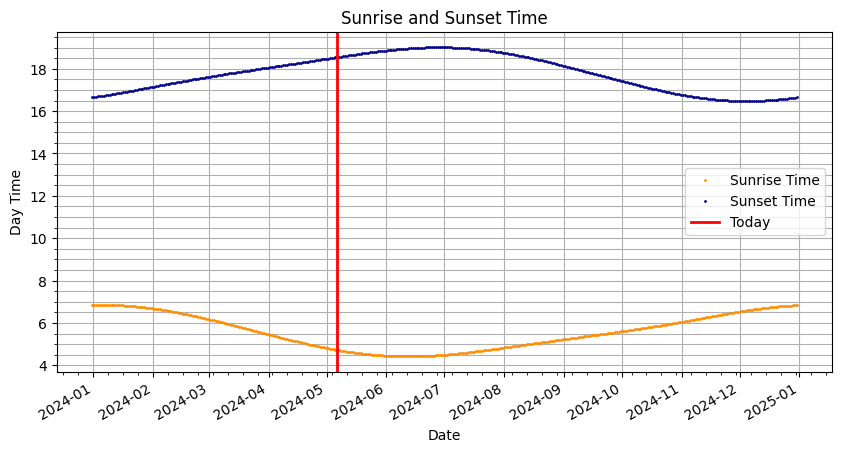

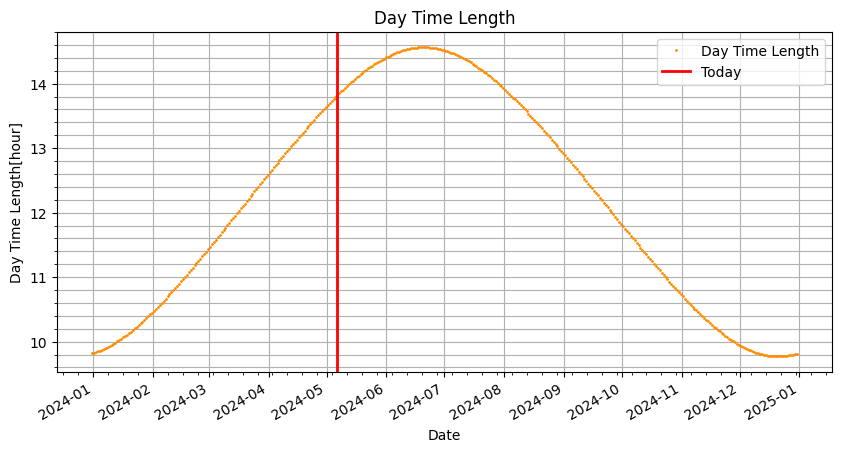

In [11]:
import mercury as mr
import ephem
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pytz import timezone
from matplotlib import ticker

app = mr.App(
    title='CalcDaytime',
    description='Calculate daytime lentgh all through the year'
)

# 左ペイン
mr.Note('**Python の天文計算ライブラリ PyEphem を使用して日の出／入を計算します**')
mr.Note('参考：[天文計算ライブラリ => PyEphem](https://rhodesmill.org/pyephem/)')
mr.Note('参考：[国立天文台 => 横浜（神奈川）](https://eco.mtk.nao.ac.jp/koyomi/dni/2024/dni15.html)')
my_flag = mr.Checkbox(value=False, label="Show Details", url_key="flag")
if my_flag.value:
    print("Checkbox is ON")
else:
    print("Checkbox is OFF")

# 右ペイン
mr.Md('# 計算結果')
mr.Md('**以下のとおり計算しました。**')

# 位置情報
lat = '35.4500'  # 横浜（神奈川）@国立天文台
lon = '139.6500' # 横浜（神奈川）@国立天文台

mr.Md('## 入力情報')
mr.Md(f'位置情報： (緯度, 経度) = ({lat}, {lon})')
mr.Md(f'🌎[地図で位置を確認する](https://www.google.com/maps?q={lat},{lon})')

point = ephem.Observer()
point.lat = lat
point.lon = lon

sf_ymd = '%Y-%m-%d'
sf_HMS = '%H:%M:%S'

tz = timezone('Asia/Tokyo')
now = datetime.datetime.utcnow()
today_str = now.astimezone(tz).strftime(sf_ymd)

x_dates = []
y_sr_times = []
y_ss_times = []
y_daytimes = []
verbose_data = []

start_year = now.astimezone(tz).year
date = datetime.datetime(year=start_year, month=1, day=1)

mr.Md('## 概要情報')

for i in range(366):
    point.date = date
    sun = ephem.Sun()
    dt0jst = datetime.datetime(year=date.year, month=date.month, day=date.day, tzinfo=datetime.timezone(datetime.timedelta(hours=+9)))
    dt1jst = ephem.localtime(point.previous_rising(sun)).astimezone(tz)
    dt2jst = ephem.localtime(point.next_setting(sun)).astimezone(tz)
    day = (dt2jst - dt1jst).total_seconds() / 60 / 60

    x_dates.append(dt0jst)
    y_sr_times.append((dt1jst - dt0jst).total_seconds() / 60 / 60)
    y_ss_times.append((dt2jst - dt0jst).total_seconds() / 60 / 60)
    y_daytimes.append(day)

    dt0str = dt0jst.strftime(sf_ymd)
    dt1str = dt1jst.strftime(sf_HMS)
    dt2str = dt2jst.strftime(sf_HMS)
    verbose_data.append(f'(日付, 日の出, 日の入, 日中長[時間]) = ({dt0str}, {dt1str}, {dt2str}, {day})')
    if dt0str == today_str:
        mr.Md(f'本日の情報： (日付, 日の出, 日の入, 日中長[時間]) = ({dt0str}, {dt1str}, {dt2str}, {day:>05.02f})')

    date += datetime.timedelta(days=1)

# 日の出：Min/Max
mr.Md('### 日の出🌅')
idx = y_sr_times.index(min(y_sr_times))
mr.Md(f'【最早】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]:>05.02f}, {y_ss_times[idx]:>05.02f}, {y_daytimes[idx]:>05.02f})')
idx = y_sr_times.index(max(y_sr_times))
mr.Md(f'【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]:>05.02f}, {y_ss_times[idx]:>05.02f}, {y_daytimes[idx]:>05.02f})')

# 日の入：Min/Max
mr.Md('### 日の入🌇')
idx = y_ss_times.index(min(y_ss_times))
mr.Md(f'【最早】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]:>05.02f}, {y_ss_times[idx]:>05.02f}, {y_daytimes[idx]:>05.02f})')
idx = y_ss_times.index(max(y_ss_times))
mr.Md(f'【最遅】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]:>05.02f}, {y_ss_times[idx]:>05.02f}, {y_daytimes[idx]:>05.02f})')

# 日中の長さ：Min/Max
mr.Md('### 日中長🌞')
idx = y_daytimes.index(max(y_daytimes))
mr.Md(f'【夏至】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]:>05.02f}, {y_ss_times[idx]:>05.02f}, {y_daytimes[idx]:>05.02f})')
idx = y_daytimes.index(min(y_daytimes))
mr.Md(f'【冬至】： (日付, 日の出, 日の入, 日中長[時間]) = ({x_dates[idx].strftime(sf_ymd)}, {y_sr_times[idx]:>05.02f}, {y_ss_times[idx]:>05.02f}, {y_daytimes[idx]:>05.02f})')

# グラフ描画（日の出、日の入の時刻）
plt.figure(figsize=[10, 5])
plt.plot_date(x_dates, y_sr_times, markersize=1, color='darkorange')
plt.plot_date(x_dates, y_ss_times, markersize=1, color='darkblue')
plt.axvline(now.astimezone(tz), color='r', linestyle='solid', linewidth=2)
plt.title("Sunrise and Sunset Time")
plt.xlabel("Date")
plt.ylabel("Day Time")
plt.legend(['Sunrise Time', 'Sunset Time', 'Today'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gcf().autofmt_xdate()
plt.grid(axis="x")
plt.minorticks_on()
plt.grid(which = "both", axis="y")
plt.show()

# グラフ描画（日中の長さ）
plt.figure(figsize=[10, 5])
plt.plot_date(x_dates, y_daytimes, markersize=1, color='darkorange')
plt.axvline(now.astimezone(tz), color='r', linestyle='solid', linewidth=2)
plt.title("Day Time Length")
plt.xlabel("Date")
plt.ylabel("Day Time Length[hour]")
plt.legend(['Day Time Length', 'Today'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gcf().autofmt_xdate()
plt.grid(axis="x")
plt.minorticks_on()
plt.grid(which = "both", axis="y")
plt.show()

# 全データ出力
if my_flag.value:
    mr.Md('## 詳細情報')
    for data in verbose_data[0:]:
        mr.Md(data)
